In [115]:
using JuMP, Gurobi, LinearAlgebra, CSV, DataFrames, Pkg, Distances, Plots

In [44]:
centers = CSV.read("centers.csv", DataFrame, header=false);
centers2 = CSV.read("centers2.csv", DataFrame, header=false);
landfills = CSV.read("landfills.csv", DataFrame, header=false);
landfills2 = CSV.read("landfills2.csv", DataFrame, header=false);
q = CSV.read("q.csv", DataFrame, header=false);
q2 = CSV.read("q2.csv", DataFrame, header=false);
stations = CSV.read("stations.csv", DataFrame, header=false);
stations2 = CSV.read("stations2.csv", DataFrame, header=false);

In [45]:
first(centers, 5)

,Column1,Column2
,Float64,Float64
1,25.957,55.66
2,78.469,4.9671
3,69.968,12.903
4,44.946,47.593
5,56.687,94.92


In [62]:
first(landfills, 5)

,xco,yco
,Float64,Float64
1,72.032,36.097
2,76.138,70.191
3,21.163,44.331
4,63.265,63.989
5,49.417,69.19


In [47]:
rename!(centers,:Column1 => "xco" );
rename!(centers,:Column2 => "yco" );
rename!(landfills,:Column1 => "xco" );
rename!(landfills,:Column2 => "yco" );
rename!(q,:Column1 => "waste" );

In [75]:
dmatx = pairwise(Euclidean(), centers.xco, landfills.xco);
dmaty = pairwise(Euclidean(), centers.yco, landfills.yco);

In [74]:
dmat = sqrt.((dmatx.^2)+(dmaty.^2));

In [89]:
mod = JuMP.Model(JuMP.optimizer_with_attributes(() -> Gurobi.Optimizer(),"MIPGap" => 0.0001))
set_optimizer_attribute(mod, "OutputFlag", 0) 

@variable(mod, z[j=1:15], Bin)
@variable(mod, x[i=1:50,j=1:15]>=0)

@constraint(mod, [i=1:50], sum(x[i,j] for j=1:15)== q[i,1])
@constraint(mod, [i=1:50, j=1:15], x[i,j] <= 1000000*z[j])
@constraint(mod, sum(z[j] for j=1:15)<=5)

@objective(mod, Min, sum(sum(dmat[i,j]*x[i,j] for j=1:15) for i=1:50))

optimize!(mod)

Academic license - for non-commercial use only - expires 2022-08-19


In [90]:
objective_value(mod)

840487.5240012797

In [91]:
x =  value.(x)

50×15 Matrix{Float64}:
 0.0  0.0   538.56     0.0  0.0  0.0  …  0.0  0.0     0.0      0.0   0.0
 0.0  0.0     0.0      0.0  0.0  0.0     0.0  0.0     0.0      0.0   0.0
 0.0  0.0     0.0      0.0  0.0  0.0     0.0  0.0     0.0      0.0   0.0
 0.0  0.0   910.83     0.0  0.0  0.0     0.0  0.0     0.0      0.0   0.0
 0.0  0.0     0.0   1053.8  0.0  0.0     0.0  0.0     0.0      0.0   0.0
 0.0  0.0   969.95     0.0  0.0  0.0  …  0.0  0.0     0.0      0.0   0.0
 0.0  0.0  1044.2      0.0  0.0  0.0     0.0  0.0     0.0      0.0   0.0
 0.0  0.0  1057.3      0.0  0.0  0.0     0.0  0.0     0.0      0.0   0.0
 0.0  0.0     0.0      0.0  0.0  0.0     0.0  0.0  1097.6      0.0   0.0
 0.0  0.0     0.0      0.0  0.0  0.0     0.0  0.0   961.35     0.0   0.0
 0.0  0.0   955.27     0.0  0.0  0.0  …  0.0  0.0     0.0      0.0   0.0
 0.0  0.0  1012.8      0.0  0.0  0.0     0.0  0.0     0.0      0.0   0.0
 0.0  0.0     0.0      0.0  0.0  0.0     0.0  0.0     0.0    917.62  0.0
 ⋮                          

In [92]:
z=value.(z)

15-element Vector{Float64}:
 -0.0
  0.0
  1.0
  1.0
 -0.0
 -0.0
  1.0
 -0.0
 -0.0
 -0.0
  0.0
  0.0
  1.0
  1.0
 -0.0

In [93]:
built_ind = [3,4,7,13,14];

In [113]:
#test = []
#for (i,v) in enumerate(built_ind)
#    temp = landfills[v,:]
#    test = [test; temp]
#end
#print(test)

In [112]:
#test[:,1];

In [118]:
lf_b = landfills[built_ind,:]

,xco,yco
,Float64,Float64
1,21.163,44.331
2,63.265,63.989
3,77.801,14.727
4,84.261,71.562
5,13.93,71.108


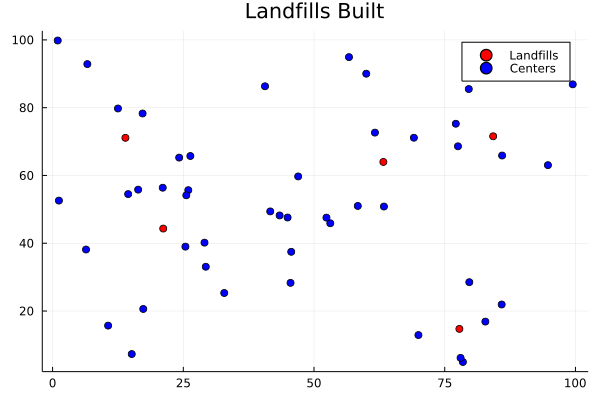

In [133]:
plot(lf_b.xco, lf_b.yco, seriestype = :scatter, color = "red", title = "Landfills Built",label = "Landfills")
plot!(centers.xco, centers.yco, seriestype = :scatter, color = "blue", label = "Centers")